<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/visualizing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing imputed dataset (imputed by crude backfilling)


In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Mounted at /gdrive


In [2]:
%cd "/gdrive/My Drive/tensor-flow-state/tensor-flow-state"

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
import pandas as pd
df = pd.read_csv("data/df_imputed_week_shift.csv", index_col = 0, parse_dates = True)

In [0]:
cols = ["speed", "flow", "speed_-2", "speed_-1","speed_+1", "speed_+2", "flow_-2", "flow_-1", "flow_+1", "flow_+2", "speed_limit"]
speed_cols = ["speed", "speed_-2", "speed_-1","speed_+1", "speed_+2"]
flow_cols = ["flow", "flow_-2", "flow_-1", "flow_+1", "flow_+2"]

In [0]:
import numpy as np
def resample_df(df, freq = "D", method_speed = np.mean, method_flow = np.sum):
    copied = df.resample(freq).agg({
           "speed": method_speed, "speed_-2": method_speed, "speed_-1": method_speed, "speed_+1": method_speed, "speed_+2": method_speed,
           "flow": method_flow, "flow_-2": method_flow, "flow_-1": method_flow, "flow_+1": method_flow, "flow_+2": method_flow})
    return copied

In [0]:
df_D =  resample_df(df, method_speed = np.mean)

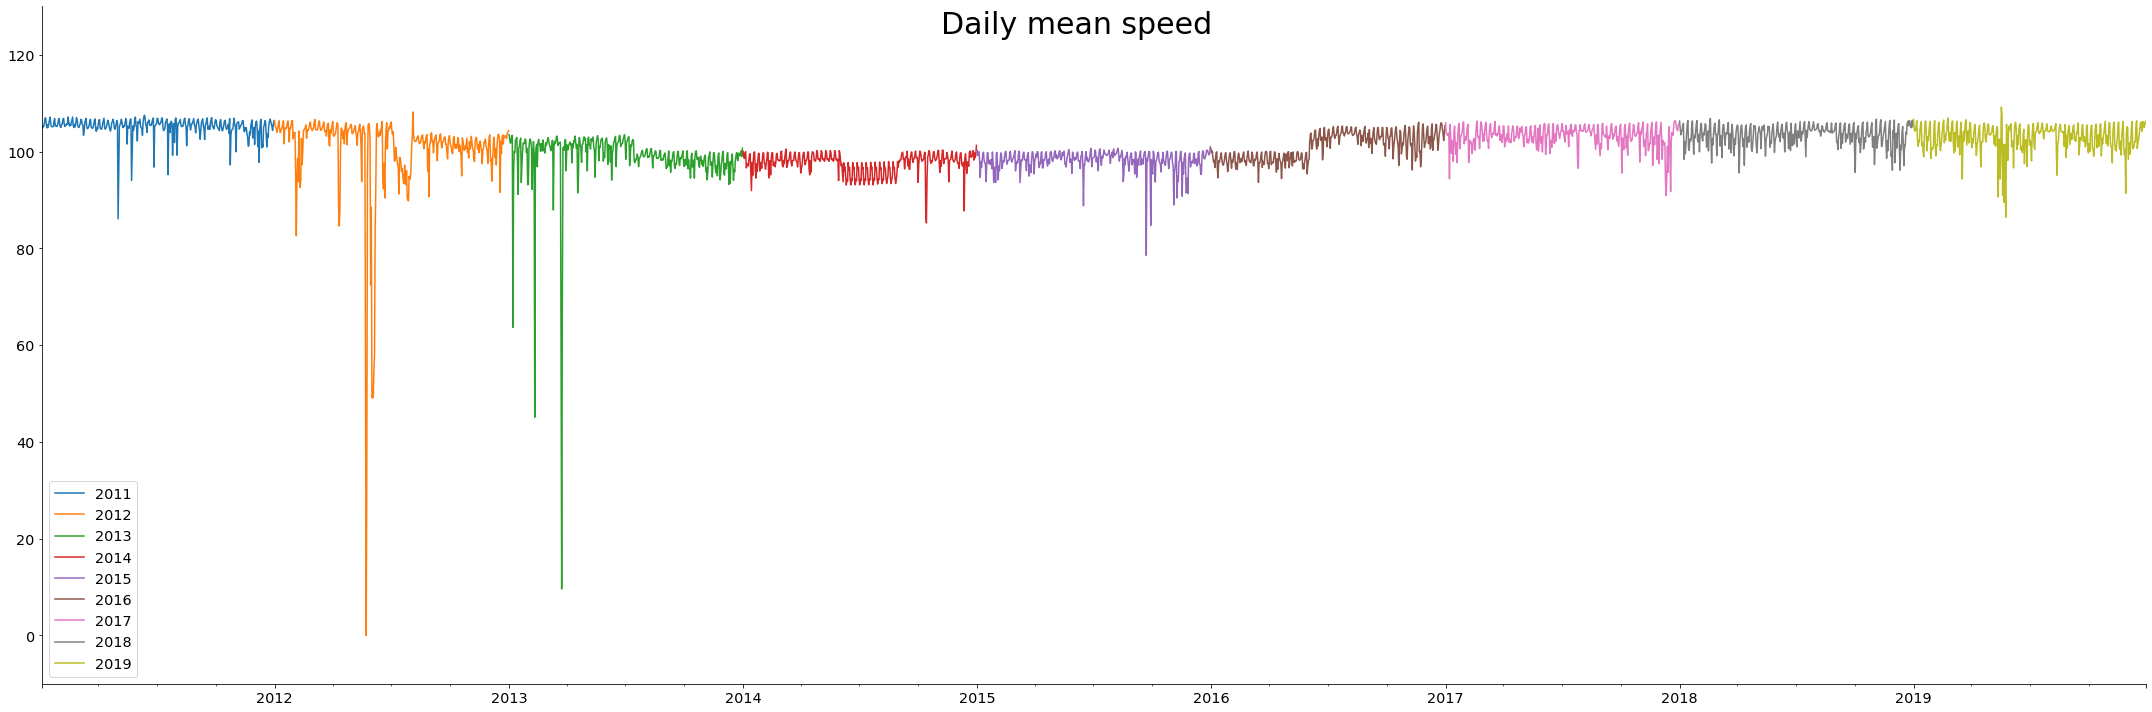

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize = (30, 10), sharey = True)
fig.suptitle('Daily mean speed', fontsize = 30)
ax.set_ylim(-10, 130)
for i, year in enumerate(range(2011, 2020)):
    df_D[(df_D.index.year == year)]['speed'].plot(ax = ax, label = year)
ax.legend()
sns.despine()
plt.tight_layout()

In [0]:
fig.savefig('plots/Daily_speed_mean.png', dpi = 600)

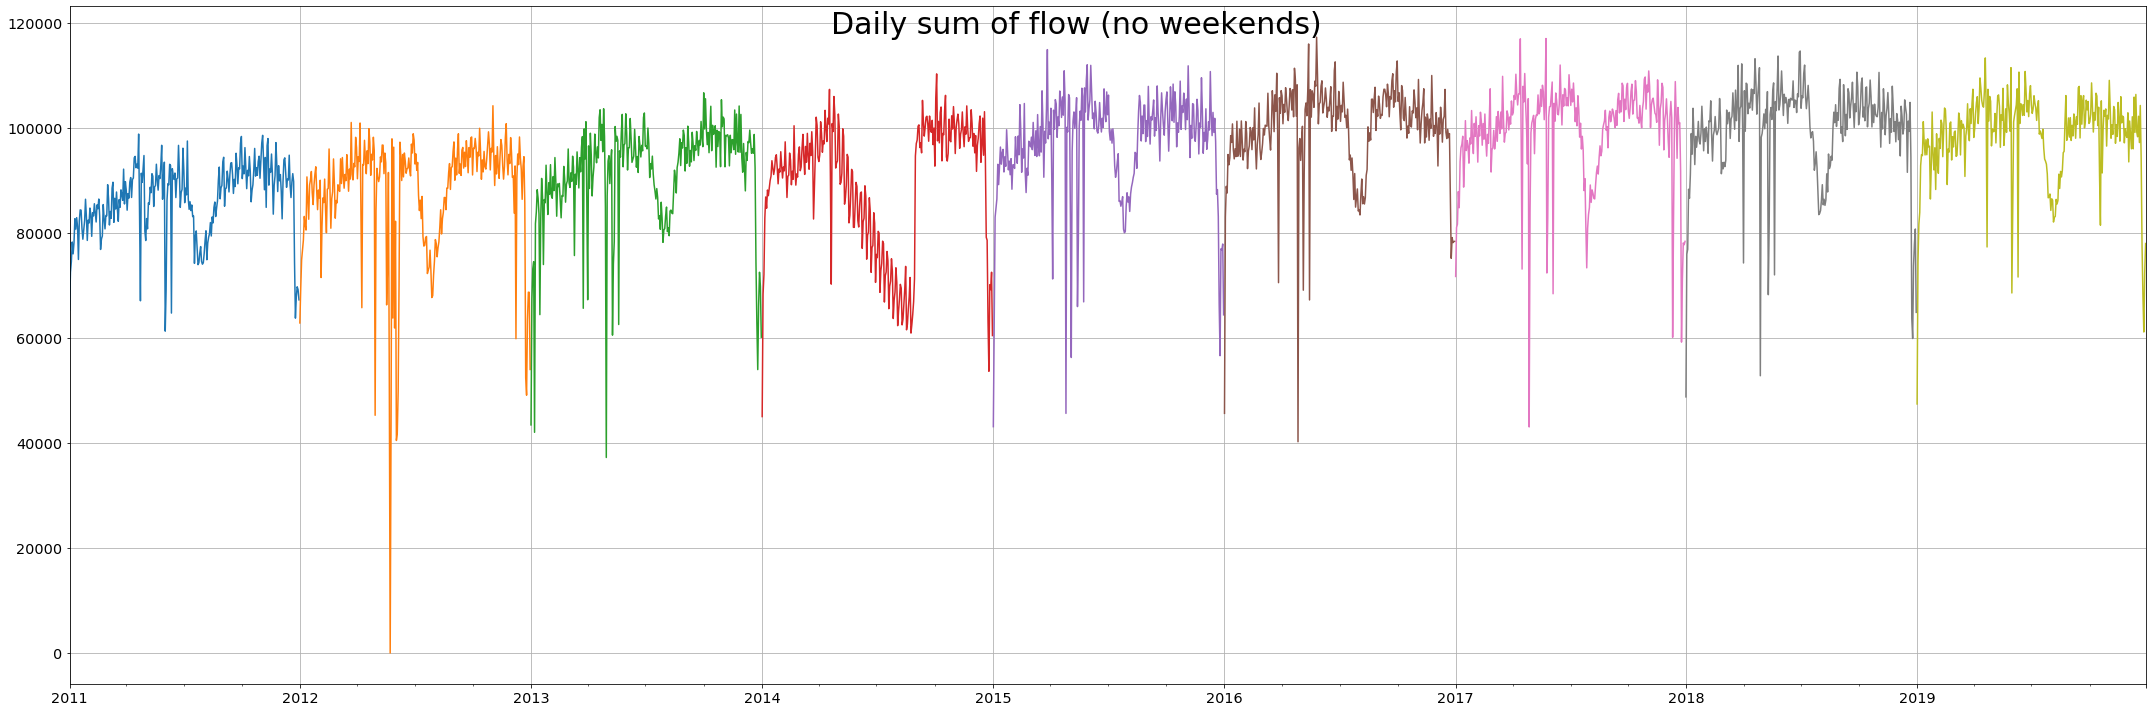

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (50, 20),
         'axes.labelsize': 'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize = (30, 10), sharey = True)
fig.suptitle('Daily sum of flow (no weekends)', fontsize = 30)


for i, year in enumerate(range(2011, 2020)):
    df_D[(df_D.index.year == year) & (df_D.index.dayofweek != 5) & (df_D.index.dayofweek != 6)]['flow'].plot(ax = ax, label = year)
plt.grid(True)
ax.legend()
sns.despine()
plt.tight_layout()

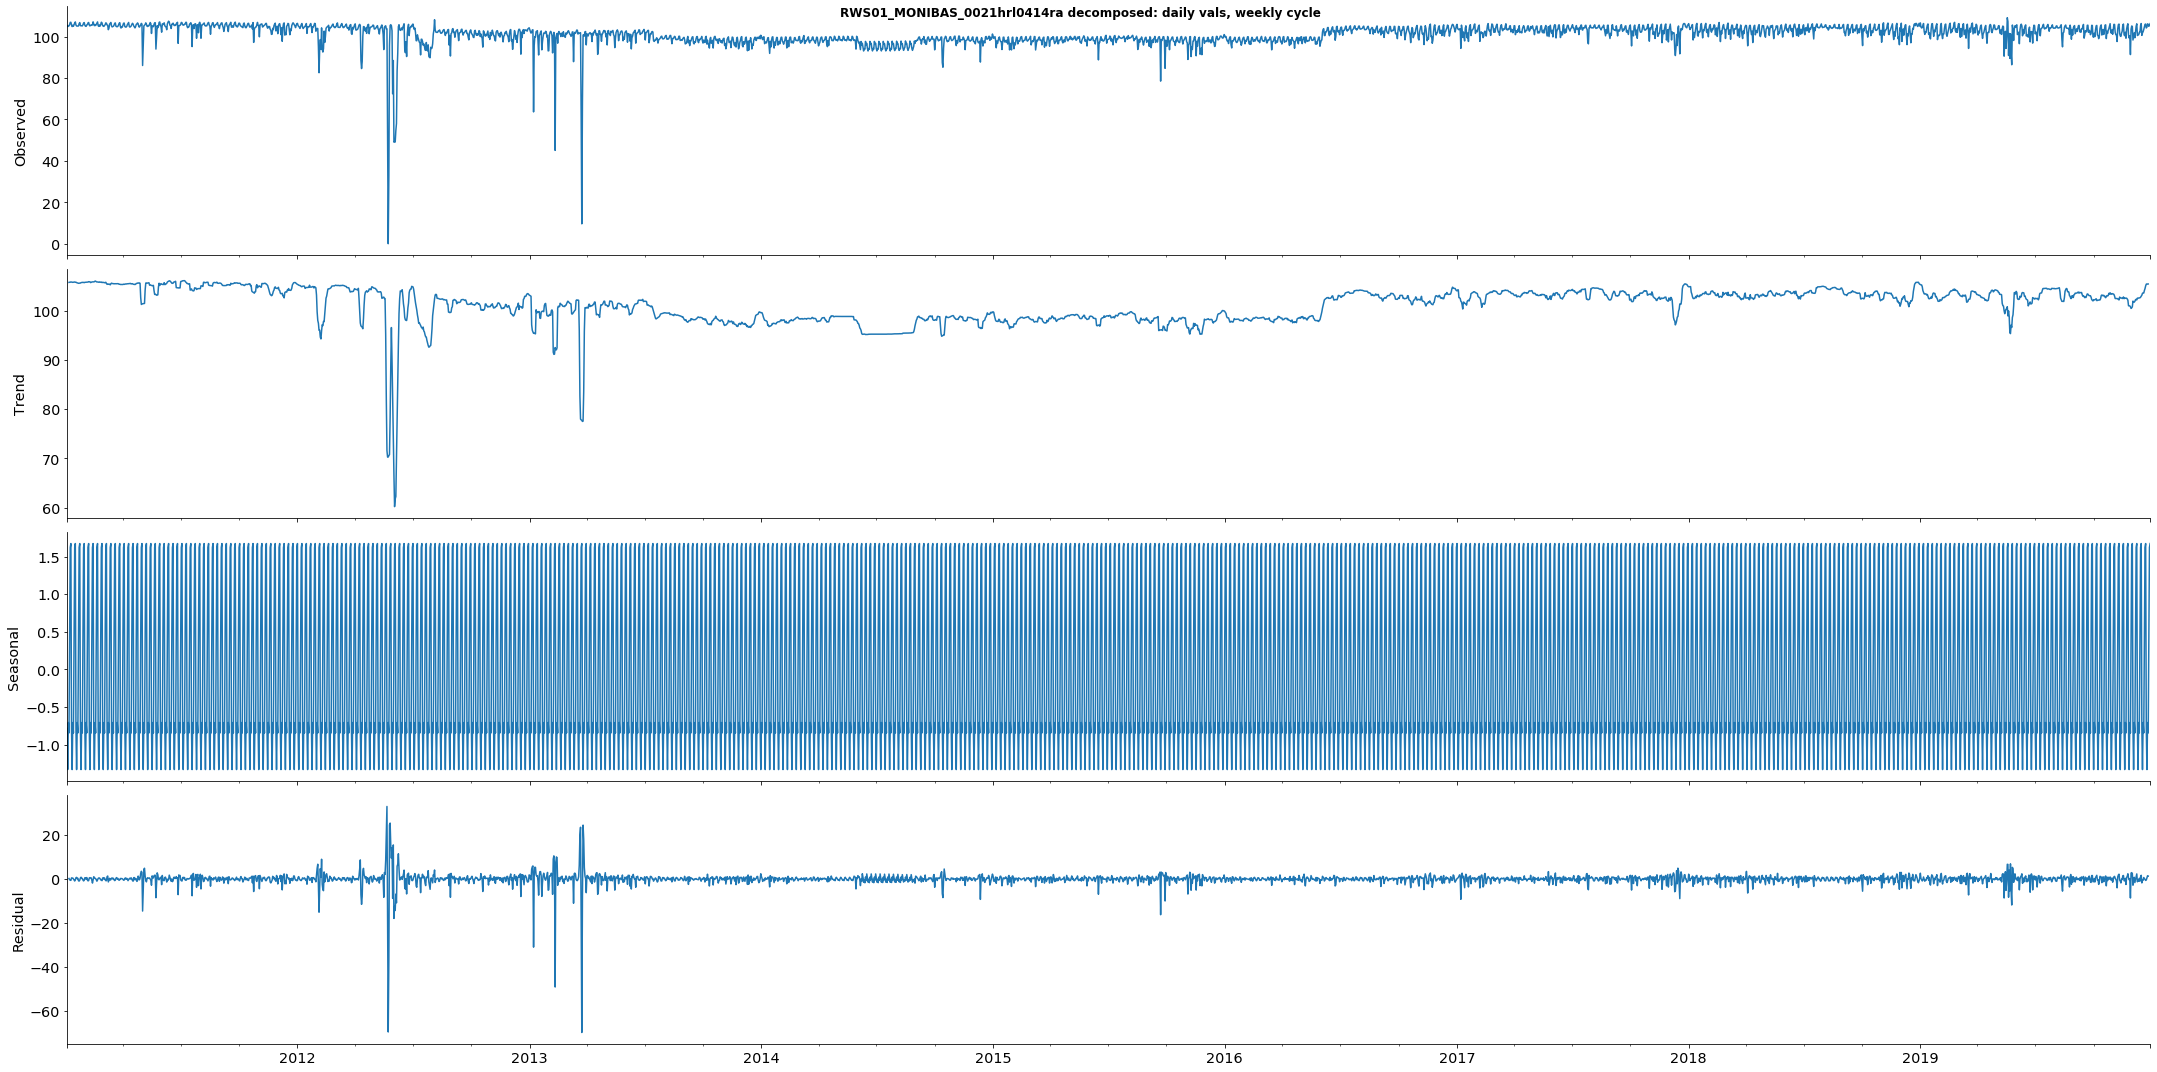

In [39]:
# Plot seasonal decomposition
import statsmodels.tsa.api as smt

y = df.speed
y_hour = y.resample('H').mean()
y_day = y.resample('D').mean()
y_week = y.resample('W').mean()

decomp = smt.seasonal_decompose(y_day, model = 'additive', freq = 7)
fig =  plt.figure(figsize = (30, 15))
fig.suptitle(f'RWS01_MONIBAS_0021hrl0414ra decomposed: daily vals, weekly cycle', fontsize = 12, fontweight = 'bold', y = 0.990)
layout = (4, 1)
observed_ax = plt.subplot2grid(layout, (0, 0))
observed_ax.set_ylabel('Observed')
trend_ax = plt.subplot2grid(layout, (1, 0))
trend_ax.set_ylabel('Trend')
seasonal_ax = plt.subplot2grid(layout, (2, 0))
seasonal_ax.set_ylabel('Seasonal')
residual_ax = plt.subplot2grid(layout, (3, 0))
residual_ax.set_ylabel('Residual')
observed_ax.get_shared_x_axes().join(observed_ax, trend_ax, seasonal_ax, residual_ax)
decomp.observed.plot(ax = observed_ax)
decomp.trend.plot(ax = trend_ax)
decomp.seasonal.plot(ax = seasonal_ax)
decomp.resid.plot(ax = residual_ax)
sns.despine()
plt.tight_layout()
plt.show()

In [0]:
import statsmodels.tsa.api as smt
def correlation_plot(y, title, lags=None, figsize=(16, 9)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=120)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return fig, ts_ax, acf_ax, pacf_ax

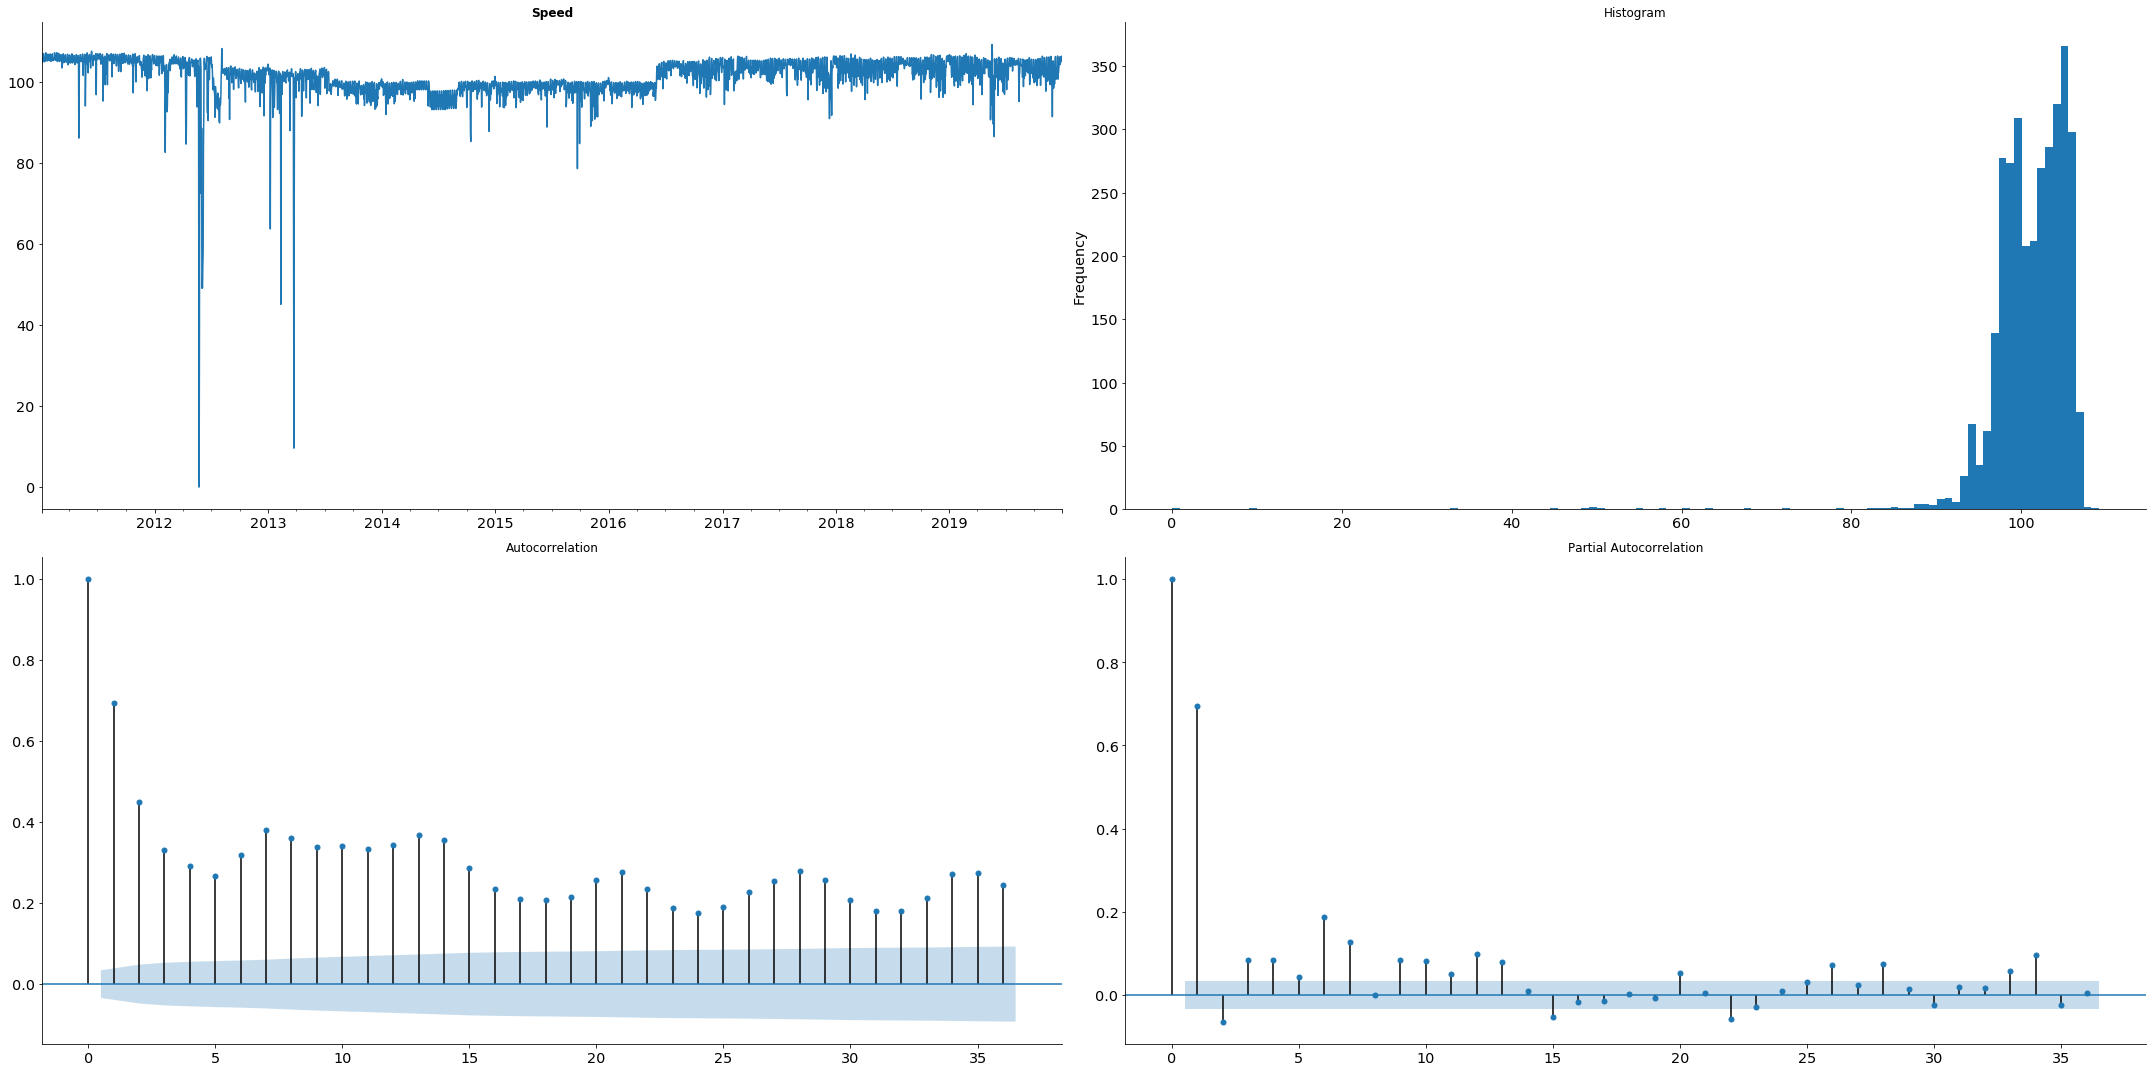

In [16]:
fig = correlation_plot(df_D.speed, 'Speed', figsize = (30,15))[0]
plt.show()
